# 数据的解析与获取1
## 1、RE正则表达式学习

In [15]:
import re

# 正则 + 匹配字符串 + 
# findall:匹配字符串中所有的符合正则的内容[返回的是列表]。
lst = re.findall(r"/d+", "我的电话号是：10086，他的电话号是：10087。")
print(lst)
print()

# finditer:匹配字符串中所有的内容[返回的是迭代器]，从迭代器中拿到内容需要.group()。
it = re.finditer(r"/d+", "我的电话号是：10086，他的电话号是：10087。")
print(it)
for i in it:
    print(i)
    print(i.group())
print()

# search:找到一个结果就返回，返回的结果是match对象，拿数据需要.group()
s = re.search(r"/d+", "我的电话号是：10086，他的电话号是：10087。")
print(s)
print(s.group())
print()

# match是从头开始匹配。
s = re.match(r"/d+", "我的电话号是：10086，他的电话号是：10087。")
# 报错代码，因为开头不是数字。
# print(s.group()) 
s = re.match(r"/d+", "10086，他的电话号是：10087。")
print(s.group()) 
print()

# 预加载正则表达式
obj = re.compile(r"/d+")
res = obj.findall("我的电话号是：10086，他的电话号是：10087。")
print(res)


['10086', '10087']

<re.Match object; span=(7, 12), match='10086'>
10086
<re.Match object; span=(20, 25), match='10087'>
10087

<re.Match object; span=(7, 12), match='10086'>
10086

10086

['10086', '10087']


In [19]:
# 实战：
s = """
<div class="abc"><span id="1">巴拉巴拉</span></div>
<div class="abd"><span id="2">牛逼</span></div>
<div class="abe"><span id="3">好好好</span></div>
<div class="abf"><span id="4">败犬</span></div>
<div class="abg"><span id="5">女主</span></div>
"""

# re.S：让.能匹配换行符
obj = re.compile(r"<div class=\".*?\"><span id=\".*?\">.*?</span></div>", re.S)

result = obj.finditer(s)
for it in result:
    print(it.group())
print()

# 我们可以起名，这样选取好选。（?P<名字>正则表达式）可以单独从正则匹配的内容中进一步提取内容。
obj = re.compile(r"<div class=\".*?\"><span id=\".*?\">(?P<nb>.*?)</span></div>", re.S)

result = obj.finditer(s)
for it in result:
    print(it.group("nb"))


<div class="abc"><span id="1">巴拉巴拉</span></div>
<div class="abd"><span id="2">牛逼</span></div>
<div class="abe"><span id="3">好好好</span></div>
<div class="abf"><span id="4">败犬</span></div>
<div class="abg"><span id="5">女主</span></div>

巴拉巴拉
牛逼
好好好
败犬
女主


## 2、实战演练一：豆瓣电影排行。
项目思路：
1. 拿到页面源代码。
2. 通过re正则表达式提取有效信息。
3. 保存起来到csv文件。
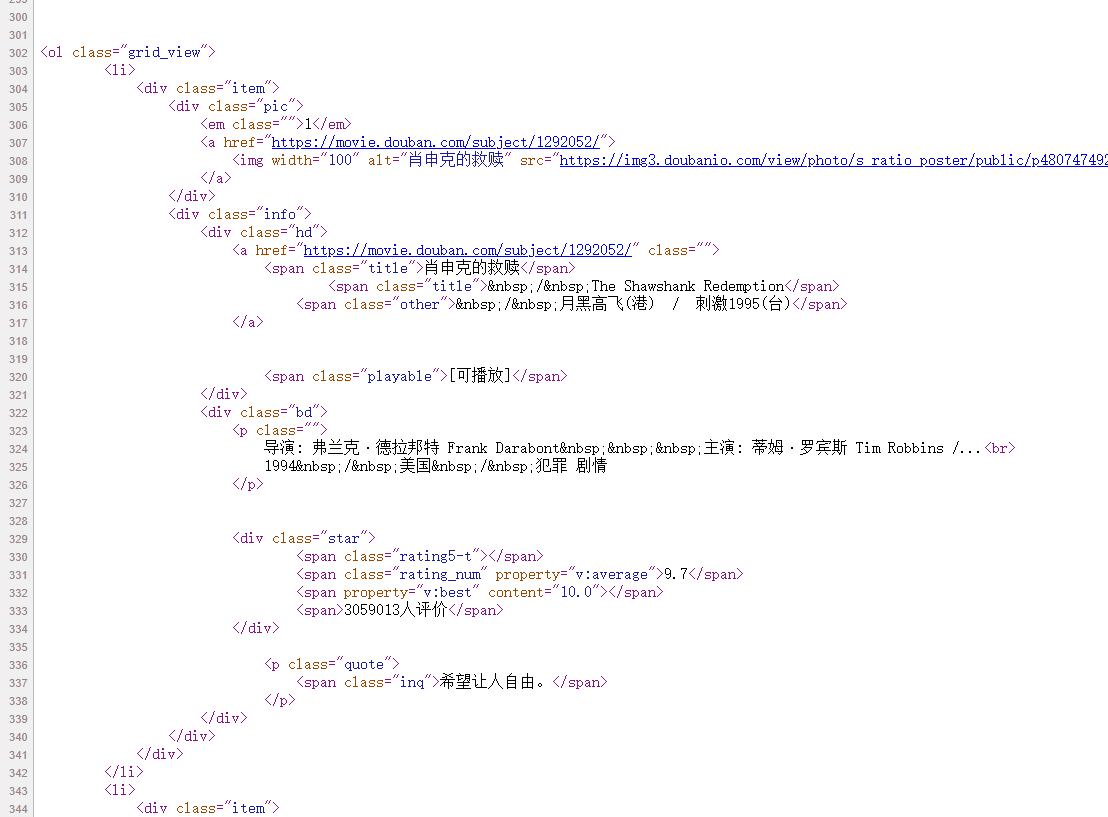

In [16]:
import re
import requests
import csv

# 1、提取源代码：
url = "https://movie.douban.com/top250"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}
resp = requests.get(url,headers=headers)
data = resp.text
# print(data)
resp.close()

# 2、提取内容：电影名字，年份，评分，评价。
## 解析数据
obj = re.compile(r'<li>.*?<div class="item">.*?<span class="title">(?P<name>.*?)'
                 r'</span>.*?<p class="">.*?<br>(?P<year>.*?)&nbsp'
                 r'.*?<span class="rating_num" property="v:average">(?P<score>.*?)</span>'
                 r'.*?<span>(?P<num>.*?)</span>.*?', re.S)

## 开始匹配
res = obj.finditer(data)
for it in res:
    print(it.group("name"),end = " ")
    print(it.group("year").strip(),end = " ")
    print(it.group("score"),end = " ")
    print(it.group("num"))

# 3、保存数据：
# 每用一次就要再写一次。
res = obj.finditer(data)
f = open("data.csv", mode="w",encoding="utf-8",newline="")
csvwriter = csv.writer(f)
for it in res:
    dic = it.groupdict()
    dic['year'] = dic['year'].strip()
    csvwriter.writerow(dic.values())

f.close()
print("over!")

# 下面这种也行。
"""
# 3、保存数据：
with open("data.csv", mode="w", encoding="utf-8-sig", newline='') as f:
    csvwriter = csv.writer(f)
    # 写入表头
    csvwriter.writerow(["name", "year", "score", "num"])
    
    for it in res:
        dic = it.groupdict()
        dic['year'] = dic['year'].strip()
        csvwriter.writerow(dic.values())

print("over!")
"""

肖申克的救赎 1994 9.7 3059013人评价
霸王别姬 1993 9.6 2259357人评价
阿甘正传 1994 9.5 2278454人评价
泰坦尼克号 1997 9.5 2318302人评价
千与千寻 2001 9.4 2367193人评价
这个杀手不太冷 1994 9.4 2400921人评价
美丽人生 1997 9.5 1393217人评价
星际穿越 2014 9.4 1988078人评价
盗梦空间 2010 9.4 2180255人评价
楚门的世界 1998 9.4 1844085人评价
辛德勒的名单 1993 9.5 1178292人评价
忠犬八公的故事 2009 9.4 1459357人评价
海上钢琴师 1998 9.3 1760614人评价
三傻大闹宝莱坞 2009 9.2 1952529人评价
放牛班的春天 2004 9.3 1383904人评价
机器人总动员 2008 9.3 1389325人评价
疯狂动物城 2016 9.2 2075553人评价
无间道 2002 9.3 1453741人评价
控方证人 1957 9.6 629468人评价
大话西游之大圣娶亲 1995 9.2 1609457人评价
熔炉 2011 9.3 979581人评价
教父 1972 9.3 1028166人评价
触不可及 2011 9.3 1195615人评价
当幸福来敲门 2006 9.2 1594917人评价
寻梦环游记 2017 9.1 1803957人评价
over!


'\n# 3、保存数据：\nwith open("data.csv", mode="w", encoding="utf-8-sig", newline=\'\') as f:\n    csvwriter = csv.writer(f)\n    # 写入表头\n    csvwriter.writerow(["name", "year", "score", "num"])\n    \n    for it in res:\n        dic = it.groupdict()\n        dic[\'year\'] = dic[\'year\'].strip()\n        csvwriter.writerow(dic.values())\n\nprint("over!")\n'

In [22]:
# 上述的只可以获取第一页，如果想要获取更多页数：
# 我们可以利用网页的页数变化：https://movie.douban.com/top250?start=25&filter=
# 利用算法知识继续写。
import re
import requests
import csv

now = 0

obj = re.compile(r'<li>.*?<div class="item">.*?<span class="title">(?P<name>.*?)'
                 r'</span>.*?<p class="">.*?<br>(?P<year>.*?)&nbsp'
                 r'.*?<span class="rating_num" property="v:average">(?P<score>.*?)</span>'
                 r'.*?<span>(?P<num>.*?)</span>.*?', re.S)

f = open("data.csv", mode="w",encoding="utf-8",newline="")
csvwriter = csv.writer(f)
csvwriter.writerow(["name", "year", "score", "num"])

while True:
    print(now)
    if now > 225:
        break
    url = f"https://movie.douban.com/top250?start={now}&filter="
    print(url)
    headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
    }
    resp = requests.get(url,headers=headers)
    data = resp.text
    # print(data)
    resp.close()

    res = obj.finditer(data)
    for it in res:
        dic = it.groupdict()
        dic['year'] = dic['year'].strip()
        csvwriter.writerow(dic.values())

    now += 25

f.close()
print("over")

0
https://movie.douban.com/top250?start=0&filter=
25
https://movie.douban.com/top250?start=25&filter=
50
https://movie.douban.com/top250?start=50&filter=
75
https://movie.douban.com/top250?start=75&filter=
100
https://movie.douban.com/top250?start=100&filter=
125
https://movie.douban.com/top250?start=125&filter=
150
https://movie.douban.com/top250?start=150&filter=
175
https://movie.douban.com/top250?start=175&filter=
200
https://movie.douban.com/top250?start=200&filter=
225
https://movie.douban.com/top250?start=225&filter=
250
over


## 3、实战演练二：获取电影名称与下载链接
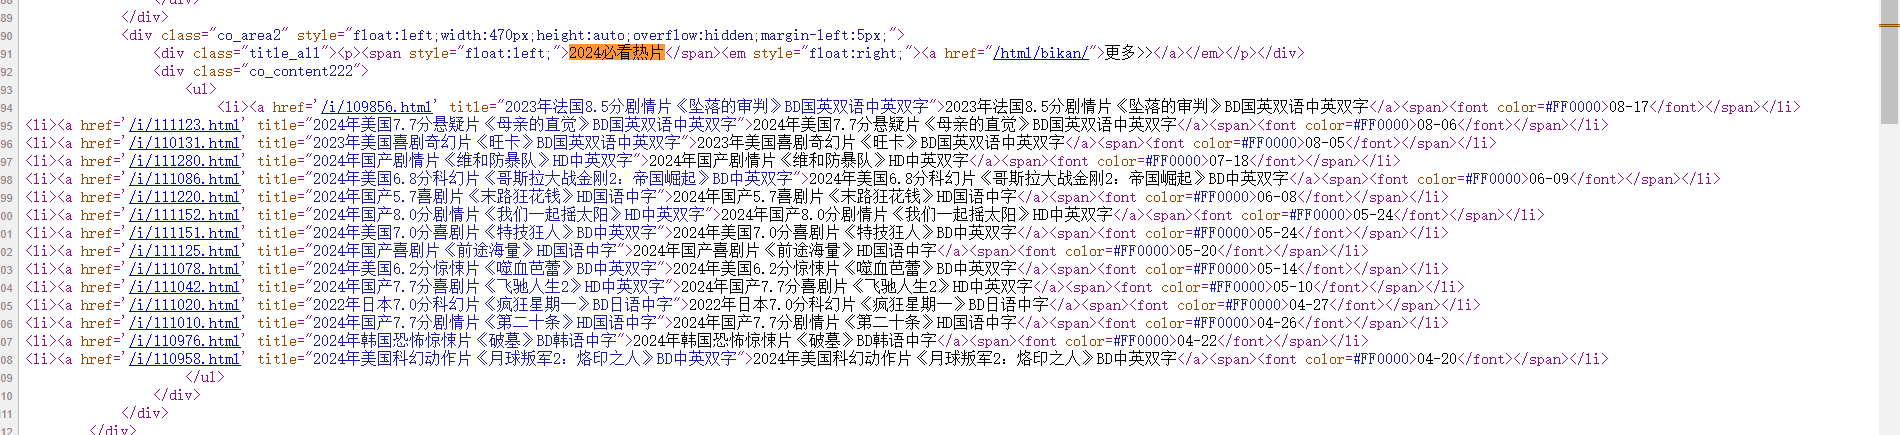

In [23]:
# 1、定位到2024必看热片。
# 2、从2024必看片中提取到子页面的链接地址。
# 3、请求子页面的链接地址，拿到我们想要的下载地址。
import requests
import re

# 这个网页带有一定的防护。
url = "https://www.dytt89.com/"

headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}

# resp = requests.get(url, verify=False) # verify=False 去掉安全验证。
resp = requests.get(url, headers=headers)

# 编码是gb2312，<META http-equiv=Content-Type content="text/html; charset=gb2312">
resp.encoding = 'gb2312' # gbk也可以

obj1 = re.compile(r"2024必看热片.*?<ul>(?P<ul>.*?)</ul>", re.S)
obj2 = re.compile(r"<a href='(?P<href>.*?)'", re.S)

res1 = obj1.search(resp.text)

print(res1.group('ul').strip())

res2 = obj2.finditer(res1.group('ul'))

# 注意你此时提取出来的是链接+标题的超链接，我们完全可以通过herf进入并找到下载链接。
list = []
for it in res2:
    # print(url + it.group('href'))
    child_url = url + it.group('href').strip('/')
    print(child_url)
    list.append(child_url)

obj3 = re.compile(r'<br />◎片　　名　(?P<name>.*?)<br />.*?<td style="WORD-WRAP: break-word" bgcolor="#fdfddf"><a href="(?P<download>.*?)"', re.S)

for herf in list:
    child_resp = requests.get(herf, headers=headers)
    child_resp.encoding = 'gb2312' # gbk也可以
    res3 = obj3.search(child_resp.text)
    print(res3.group('name'), end = " ")
    print("下载地址：", end="")
    print(res3.group('download'))

resp.close()


<li><a href='/i/109856.html' title="2023年法国8.5分剧情片《坠落的审判》BD国英双语中英双字">2023年法国8.5分剧情片《坠落的审判》BD国英双语中英双字</a><span><font color=#FF0000>08-17</font></span></li>
<li><a href='/i/111123.html' title="2024年美国7.7分悬疑片《母亲的直觉》BD国英双语中英双字">2024年美国7.7分悬疑片《母亲的直觉》BD国英双语中英双字</a><span><font color=#FF0000>08-06</font></span></li>
<li><a href='/i/110131.html' title="2023年美国喜剧奇幻片《旺卡》BD国英双语中英双字">2023年美国喜剧奇幻片《旺卡》BD国英双语中英双字</a><span><font color=#FF0000>08-05</font></span></li>
<li><a href='/i/111280.html' title="2024年国产剧情片《维和防暴队》HD中英双字">2024年国产剧情片《维和防暴队》HD中英双字</a><span><font color=#FF0000>07-18</font></span></li>
<li><a href='/i/111086.html' title="2024年美国6.8分科幻片《哥斯拉大战金刚2：帝国崛起》BD中英双字">2024年美国6.8分科幻片《哥斯拉大战金刚2：帝国崛起》BD中英双字</a><span><font color=#FF0000>06-09</font></span></li>
<li><a href='/i/111220.html' title="2024年国产5.7喜剧片《末路狂花钱》HD国语中字">2024年国产5.7喜剧片《末路狂花钱》HD国语中字</a><span><font color=#FF0000>06-08</font></span></li>
<li><a href='/i/111152.html' title="2024年国产8.0分剧情片《我们一起摇太阳》HD中英双字">2024年国产8.0分剧情片《我们一起摇太阳》HD中英双字</